<a href="https://colab.research.google.com/github/Rin4797/Data_Augmentation_Research/blob/main/drafts/Augmentation_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import pickle

import tensorflow as tf

!pip install tensorflow-addons
import tensorflow_addons as tfa

import random

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.1/612.1 kB 7.7 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [2]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 3887876592719029499
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 15240134656
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 6530761243977093799
 physical_device_desc: "device: 0, name: Tesla V100-SXM2-16GB, pci bus id: 0000:00:04.0, compute capability: 7.0"
 xla_global_id: 416903419]

In [3]:
# загрузка файла с классом для визуализации

import sys
import os
from google.colab import files

!wget https://raw.githubusercontent.com/Rin4797/Data_Augmentation_Research/main/visualization.py

from visualization import DataVisualization, ModelVisualization, draw_dataframe

--2023-10-05 17:10:11--  https://raw.githubusercontent.com/Rin4797/Data_Augmentation_Research/main/visualization.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8935 (8.7K) [text/plain]
Saving to: ‘visualization.py’

visualization.py    100%[===================>]   8.73K  --.-KB/s    in 0s      

2023-10-05 17:10:11 (115 MB/s) - ‘visualization.py’ saved [8935/8935]



# Данные

## Загрузка датасета

In [4]:
!pip install yadisk
import yadisk
y = yadisk.YaDisk()
y.download_by_link("https://disk.yandex.ru/d/SqM9S_cG9oVlww", "dataset-loz2.zip")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.9/54.9 kB 2.2 MB/s eta 0:00:00


In [5]:
url_clear = 'https://github.com/Rin4797/Data_Augmentation_Research/raw/main/my_dataset/clear.zip'
url_G = 'https://github.com/Rin4797/Data_Augmentation_Research/raw/main/my_dataset/G.zip'
url_GP = 'https://github.com/Rin4797/Data_Augmentation_Research/raw/main/my_dataset/GP.zip'
url_M = 'https://github.com/Rin4797/Data_Augmentation_Research/raw/main/my_dataset/M.zip'
url_T = 'https://github.com/Rin4797/Data_Augmentation_Research/raw/main/my_dataset/T.zip'

In [6]:
!mkdir dataset
%cd dataset

!wget https://github.com/Rin4797/Data_Augmentation_Research/raw/main/my_dataset/clear.zip
!unzip clear.zip
!rm clear.zip

!wget https://github.com/Rin4797/Data_Augmentation_Research/raw/main/my_dataset/G.zip
!unzip G.zip
!rm G.zip

!wget https://github.com/Rin4797/Data_Augmentation_Research/raw/main/my_dataset/GP.zip
!unzip GP.zip
!rm GP.zip

!wget https://github.com/Rin4797/Data_Augmentation_Research/raw/main/my_dataset/M.zip
!unzip M.zip
!rm M.zip

!wget https://github.com/Rin4797/Data_Augmentation_Research/raw/main/my_dataset/T.zip
!unzip T.zip
!rm T.zip

!ls
%cd ..

/content/dataset
--2023-10-05 17:10:18--  https://github.com/Rin4797/Data_Augmentation_Research/raw/main/my_dataset/clear.zip
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Rin4797/Data_Augmentation_Research/main/my_dataset/clear.zip [following]
--2023-10-05 17:10:18--  https://raw.githubusercontent.com/Rin4797/Data_Augmentation_Research/main/my_dataset/clear.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20822596 (20M) [application/zip]
Saving to: ‘clear.zip’

clear.zip           100%[===================>]  19.86M  --.-KB/s    in 0.06s   

2023-10-05 17:10:19 (313 MB/s) - ‘clear.zip’ save

## Формирование датасета

In [7]:
img_init_shape = (1704, 2272)

In [8]:
import cv2

def read_dataset(name):
    im_list = []
    for f in os.listdir('dataset/' + name):
        im = cv2.imread('dataset/' + name + '/' + f)
        im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
        #print(im.shape)
        im_list.append(im.reshape(-1))
    dataset_type = np.array(im_list)
    return dataset_type

In [9]:
dataset_clear = read_dataset('clear')
print(dataset_clear.shape)

(28, 11614464)


In [10]:
dataset_G = read_dataset('G')
print(dataset_G.shape)

(38, 11614464)


In [11]:
dataset_GP = read_dataset('GP')
print(dataset_GP.shape)

(38, 11614464)


In [12]:
dataset_M = read_dataset('M')
print(dataset_M.shape)

(23, 11614464)


In [13]:
dataset_T = read_dataset('T')
print(dataset_T.shape)

(38, 11614464)


In [14]:
label_names = ['clear', 'G', 'GP', 'M', 'T']
dataset = np.concatenate((dataset_clear, dataset_G, dataset_GP, dataset_M, dataset_T), axis=0)
labels = np.array([0] * dataset_clear.shape[0] + [1] * dataset_G.shape[0] + [2] * dataset_GP.shape[0] +
         [3] * dataset_M.shape[0] + [4] * dataset_T.shape[0])

In [15]:
def form_test_batch(dataset, labels):
    sample_size = int(0.2 * dataset.shape[0])
    indexes = np.random.choice(dataset.shape[0], sample_size, replace=False)

    x=np.array([i for i in range(dataset.shape[0])])
    mask=np.full(dataset.shape[0], True, dtype=bool)
    mask[indexes]=False

    print(dataset[mask].shape, labels[mask].shape, dataset[~mask].shape, labels[~mask].shape)
    return dataset[mask], labels[mask], dataset[~mask], labels[~mask]

In [16]:
train_dataset_clear, train_labels_clear, test_dataset_clear, test_labels_clear = form_test_batch(
    dataset_clear, np.array([0] * dataset_clear.shape[0]))

train_dataset_G, train_labels_G, test_dataset_G, test_labels_G = form_test_batch(
    dataset_G, np.array([1] * dataset_G.shape[0]))

train_dataset_GP, train_labels_GP, test_dataset_GP, test_labels_GP = form_test_batch(
    dataset_GP, np.array([2] * dataset_GP.shape[0]))

train_dataset_M, train_labels_M, test_dataset_M, test_labels_M = form_test_batch(
    dataset_M, np.array([3] * dataset_M.shape[0]))

train_dataset_T, train_labels_T, test_dataset_T, test_labels_T = form_test_batch(
    dataset_T, np.array([4] * dataset_T.shape[0]))

(23, 11614464) (23,) (5, 11614464) (5,)
(31, 11614464) (31,) (7, 11614464) (7,)
(31, 11614464) (31,) (7, 11614464) (7,)
(19, 11614464) (19,) (4, 11614464) (4,)
(31, 11614464) (31,) (7, 11614464) (7,)


In [17]:
print(train_dataset_clear.shape, train_dataset_G.shape, train_dataset_GP.shape,
      train_dataset_M.shape, train_dataset_T.shape)

(23, 11614464) (31, 11614464) (31, 11614464) (19, 11614464) (31, 11614464)


In [18]:
data = DataVisualization(label_names,
                         np.concatenate((train_dataset_clear, train_dataset_G, train_dataset_GP,
                                         train_dataset_M, train_dataset_T), axis=0),
                         np.concatenate((train_labels_clear, train_labels_G, train_labels_GP,
                                         train_labels_M, train_labels_T), axis=0),
                         np.concatenate((test_dataset_clear, test_dataset_G, test_dataset_GP,
                                         test_dataset_M, test_dataset_T), axis=0),
                         np.concatenate((test_labels_clear, test_labels_G, test_labels_GP,
                                         test_labels_M, test_labels_T), axis=0),
                         image_shape=img_init_shape)

In [19]:
data.shuffle_data()
data.make_val()
data.make_data()

In [20]:
def image_format(image_data):
    return (np.transpose(image_data.reshape(3, img_init_shape[1], img_init_shape[0], order='F'), axes=[2,1,0]))

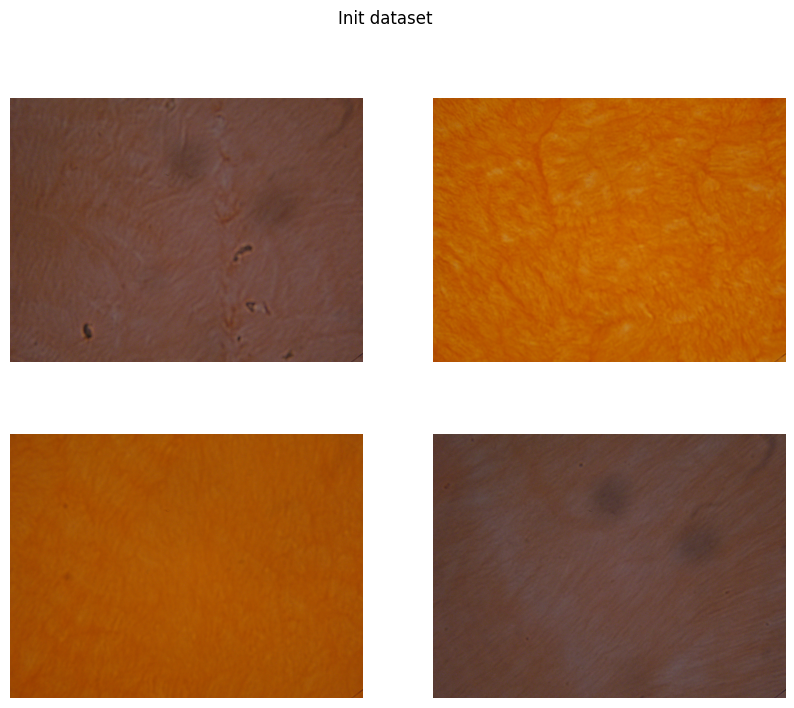

In [21]:
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.imshow(image_format(data.x_train[0]) / 255)
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(image_format(data.x_train[1]) / 255)
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(image_format(data.x_train[2]) / 255)
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(image_format(data.x_train[3]) / 255)
plt.axis('off')

_ = plt.suptitle("Init dataset")

## Описание датасета

In [22]:
data.make_data_stat()

In [23]:
data.size_data_analysis()

,name,size,std
0,train,108,5.919459
1,val,27,1.200000
2,test,30,1.264911


In [24]:
data.class_data_analysis()

,name,clear,G,GP,M,T
0,train,16,27,25,13,27
1,val,7,4,6,6,4
2,test,5,7,7,4,7


# Нейросеть

In [25]:
img_chopped_shape = (100, 100)

## MobileNet

In [26]:
mobile_model = tf.keras.applications.MobileNet(
    input_shape=(img_chopped_shape[0], img_chopped_shape[1], 3), #image_size
    alpha=1.0,
    depth_multiplier=1,
    dropout=0.001,
    include_top=True,
    weights=None,
    input_tensor=None,
    pooling=None,
    classes=5,
    classifier_activation="softmax"
)

In [27]:
mobile_model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [28]:
mobile_model.summary()

Model: "mobilenet_1.00_100"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 50, 50, 32)        864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 50, 50, 32)        128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 50, 50, 32)        0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 50, 50, 32)        288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 50, 50, 32) 

## Simple Net

In [29]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(100, (3,3), activation='relu', input_shape=(img_chopped_shape[0], img_chopped_shape[1], 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(200, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(400, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(800, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1600, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax') #кол-во классов изображений
])

In [30]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 100)       2800      
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 100)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 200)       180200    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 23, 23, 200)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 400)       720400    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 10, 10, 400)       0

# Аугментация

In [32]:
def image_chopped_format(image_data):
    return (np.transpose(image_data.reshape(3, img_chopped_shape[1], img_chopped_shape[0], order='F'), axes=[2,1,0]))

## Chop

In [33]:
def chop(data, labels):
    res = np.zeros((0, img_chopped_shape[0] * img_chopped_shape[1] * 3))
    for left_corner in range(100, img_init_shape[0] - img_chopped_shape[0], 8 * img_chopped_shape[0]):
        for top_corner in range(100, img_init_shape[1] - img_chopped_shape[1], 8 * img_chopped_shape[1]):
            res = np.concatenate((res,
                                 tf.image.crop_to_bounding_box(
                                      data, left_corner, top_corner,
                                      img_chopped_shape[0], img_chopped_shape[1]).numpy().reshape(data.shape[0], -1)),
                                 axis=0)
    #for left_corner in range(img_init_shape[0] - img_chopped_shape[0] - 101, -1, -img_chopped_shape[0]):
    #    for top_corner in range(img_init_shape[1] - img_chopped_shape[1] - 101, -1, -img_chopped_shape[1]):
    #        res = np.concatenate((res,
    #                             tf.image.crop_to_bounding_box(
    #                                  data, left_corner, top_corner,
    #                                  img_chopped_shape[0], img_chopped_shape[1]).numpy().reshape(data.shape[0], -1)),
    #                             axis=0)
    return res, np.tile(labels,
                        int(np.floor((img_init_shape[0]-img_chopped_shape[0]-100) / (8 * img_chopped_shape[0])) *
                        np.floor((img_init_shape[1]-img_chopped_shape[1]-100) / (8 * img_chopped_shape[1]))) * 3)

In [34]:
x_image_train = np.zeros((0, img_init_shape[0], img_init_shape[1], 3))
for id in range(data.x_train.shape[0]):
    x_image_train = np.concatenate((x_image_train, image_format(data.x_train[id]).reshape(1, img_init_shape[0], img_init_shape[1], 3)), axis=0)
for id in range(data.x_val.shape[0]):
    x_image_train = np.concatenate((x_image_train, image_format(data.x_val[id]).reshape(1, img_init_shape[0], img_init_shape[1], 3)), axis=0)

In [35]:
x_image_test = np.zeros((0, img_init_shape[0], img_init_shape[1], 3))
for id in range(data.x_test.shape[0]):
    x_image_test = np.concatenate((x_image_test, image_format(data.x_test[id]).reshape(1, img_init_shape[0], img_init_shape[1], 3)), axis=0)

In [36]:
chopped_x_train, chopped_y_train = chop(x_image_train, data.y_train)

In [37]:
chopped_x_test, chopped_y_test = chop(x_image_test, data.y_test)

In [38]:
del x_image_test
del x_image_train

In [39]:
chopped_data = DataVisualization(label_names,
                         chopped_x_train, chopped_y_train,
                         chopped_x_test, chopped_y_test,
                         image_shape=img_chopped_shape)

In [40]:
print(chopped_data.x_train.shape, chopped_data.y_train.shape, chopped_data.x_test.shape, chopped_data.y_test.shape)

(648, 30000) (648,) (180, 30000) (180,)


In [41]:
chopped_data.shuffle_data()
chopped_data.make_val()
chopped_data.make_data()

In [42]:
chopped_data.make_data_stat()

In [43]:
chopped_data.size_data_analysis()

,name,size,std
0,train,519,27.556487
1,val,129,8.109254
2,test,180,7.589466


In [44]:
chopped_data.class_data_analysis()

,name,clear,G,GP,M,T
0,train,78,130,117,64,130
1,val,18,32,33,14,32
2,test,30,42,42,24,42


## Rotate

In [154]:
im = chopped_data.x_train[4]

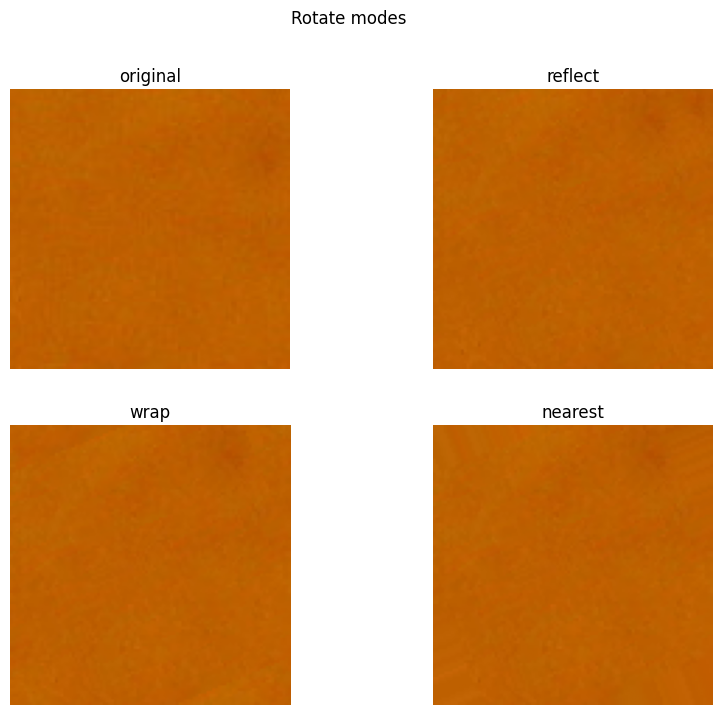

In [155]:
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.imshow(image_chopped_format(im) / 255)
plt.title("original")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(tfa.image.rotate(image_chopped_format(im), angles=tf.constant(np.pi/8), fill_mode='reflect').numpy() / 255)
plt.title("reflect")
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(tfa.image.rotate(image_chopped_format(im), angles=tf.constant(np.pi/8), fill_mode='wrap').numpy() / 255)
plt.title("wrap")
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(tfa.image.rotate(image_chopped_format(im), angles=tf.constant(np.pi/8), fill_mode='nearest').numpy() / 255)
plt.title("nearest")
plt.axis('off')

_ = plt.suptitle("Rotate modes")

In [156]:
def rotate_n_times(data, labels, n=3):
    result_data = np.array(data)
    for i in range(1, n):
        result_data = np.concatenate((result_data, tfa.image.rotate(data, angles=np.float32(2*np.pi/n), fill_mode='reflect').numpy()), axis=0)
    return result_data, np.tile(labels, n)

1
Epoch 1/15
9/9 [==============================] - 1s 70ms/step - loss: 1.5724 - accuracy: 0.2505 - val_loss: 1.5585 - val_accuracy: 0.2481
Epoch 2/15
9/9 [==============================] - 0s 34ms/step - loss: 1.5724 - accuracy: 0.2505 - val_loss: 1.5585 - val_accuracy: 0.2481
Epoch 3/15
9/9 [==============================] - 0s 33ms/step - loss: 1.5724 - accuracy: 0.2505 - val_loss: 1.5585 - val_accuracy: 0.2481
Epoch 4/15
9/9 [==============================] - 0s 33ms/step - loss: 1.5724 - accuracy: 0.2505 - val_loss: 1.5587 - val_accuracy: 0.2481
Epoch 5/15
9/9 [==============================] - 0s 34ms/step - loss: 1.5723 - accuracy: 0.2505 - val_loss: 1.5588 - val_accuracy: 0.2481
Epoch 6/15
9/9 [==============================] - 0s 34ms/step - loss: 1.5723 - accuracy: 0.2505 - val_loss: 1.5588 - val_accuracy: 0.2481
Epoch 7/15
9/9 [==============================] - 0s 33ms/step - loss: 1.5724 - accuracy: 0.2505 - val_loss: 1.5589 - val_accuracy: 0.2481
Epoch 8/15
9/9 [=========

<ipython-input-157-6dad26a9c871>:24: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(10, 2, num_of_rotations)


Epoch 1/15
25/25 [==============================] - 1s 43ms/step - loss: 1.5705 - accuracy: 0.2494 - val_loss: 1.5666 - val_accuracy: 0.2526
Epoch 2/15
25/25 [==============================] - 1s 33ms/step - loss: 1.5705 - accuracy: 0.2494 - val_loss: 1.5666 - val_accuracy: 0.2526
Epoch 3/15
25/25 [==============================] - 1s 33ms/step - loss: 1.5705 - accuracy: 0.2494 - val_loss: 1.5666 - val_accuracy: 0.2526
Epoch 4/15
25/25 [==============================] - 1s 33ms/step - loss: 1.5704 - accuracy: 0.2494 - val_loss: 1.5666 - val_accuracy: 0.2526
Epoch 5/15
25/25 [==============================] - 1s 33ms/step - loss: 1.5705 - accuracy: 0.2494 - val_loss: 1.5666 - val_accuracy: 0.2526
Epoch 6/15
25/25 [==============================] - 1s 33ms/step - loss: 1.5704 - accuracy: 0.2494 - val_loss: 1.5666 - val_accuracy: 0.2526
Epoch 7/15
25/25 [==============================] - 1s 33ms/step - loss: 1.5704 - accuracy: 0.2494 - val_loss: 1.5666 - val_accuracy: 0.2526
Epoch 8/15
25

<ipython-input-157-6dad26a9c871>:24: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(10, 2, num_of_rotations)


Epoch 1/15
41/41 [==============================] - 2s 41ms/step - loss: 1.5697 - accuracy: 0.2500 - val_loss: 1.5696 - val_accuracy: 0.2500
Epoch 2/15
41/41 [==============================] - 1s 33ms/step - loss: 1.5697 - accuracy: 0.2500 - val_loss: 1.5696 - val_accuracy: 0.2500
Epoch 3/15
41/41 [==============================] - 1s 33ms/step - loss: 1.5697 - accuracy: 0.2500 - val_loss: 1.5696 - val_accuracy: 0.2500
Epoch 4/15
41/41 [==============================] - 1s 32ms/step - loss: 1.5697 - accuracy: 0.2500 - val_loss: 1.5696 - val_accuracy: 0.2500
Epoch 5/15
41/41 [==============================] - 1s 33ms/step - loss: 1.5697 - accuracy: 0.2500 - val_loss: 1.5696 - val_accuracy: 0.2500
Epoch 6/15
41/41 [==============================] - 1s 33ms/step - loss: 1.5697 - accuracy: 0.2500 - val_loss: 1.5696 - val_accuracy: 0.2500
Epoch 7/15
41/41 [==============================] - 1s 33ms/step - loss: 1.5697 - accuracy: 0.2500 - val_loss: 1.5696 - val_accuracy: 0.2500
Epoch 8/15
41

<ipython-input-157-6dad26a9c871>:24: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(10, 2, num_of_rotations)


Epoch 1/15
57/57 [==============================] - 3s 51ms/step - loss: 1.5695 - accuracy: 0.2430 - val_loss: 1.5707 - val_accuracy: 0.2503
Epoch 2/15
57/57 [==============================] - 2s 33ms/step - loss: 1.5694 - accuracy: 0.2447 - val_loss: 1.5708 - val_accuracy: 0.2492
Epoch 3/15
57/57 [==============================] - 2s 33ms/step - loss: 1.5694 - accuracy: 0.2502 - val_loss: 1.5708 - val_accuracy: 0.2492
Epoch 4/15
57/57 [==============================] - 2s 33ms/step - loss: 1.5694 - accuracy: 0.2502 - val_loss: 1.5708 - val_accuracy: 0.2492
Epoch 5/15
57/57 [==============================] - 2s 33ms/step - loss: 1.5694 - accuracy: 0.2502 - val_loss: 1.5708 - val_accuracy: 0.2492
Epoch 6/15
57/57 [==============================] - 2s 33ms/step - loss: 1.5694 - accuracy: 0.2502 - val_loss: 1.5708 - val_accuracy: 0.2492
Epoch 7/15
57/57 [==============================] - 2s 33ms/step - loss: 1.5694 - accuracy: 0.2450 - val_loss: 1.5708 - val_accuracy: 0.2503
Epoch 8/15
57

<ipython-input-157-6dad26a9c871>:24: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(10, 2, num_of_rotations)


Epoch 1/15
73/73 [==============================] - 4s 50ms/step - loss: 1.5704 - accuracy: 0.2409 - val_loss: 1.5669 - val_accuracy: 0.2547
Epoch 2/15
73/73 [==============================] - 2s 33ms/step - loss: 1.5704 - accuracy: 0.2480 - val_loss: 1.5669 - val_accuracy: 0.2496
Epoch 3/15
73/73 [==============================] - 2s 33ms/step - loss: 1.5704 - accuracy: 0.2443 - val_loss: 1.5669 - val_accuracy: 0.2547
Epoch 4/15
73/73 [==============================] - 2s 33ms/step - loss: 1.5703 - accuracy: 0.2456 - val_loss: 1.5669 - val_accuracy: 0.2496
Epoch 5/15
73/73 [==============================] - 2s 34ms/step - loss: 1.5704 - accuracy: 0.2360 - val_loss: 1.5669 - val_accuracy: 0.2496
Epoch 6/15
73/73 [==============================] - 2s 33ms/step - loss: 1.5704 - accuracy: 0.2501 - val_loss: 1.5669 - val_accuracy: 0.2496
Epoch 7/15
73/73 [==============================] - 2s 33ms/step - loss: 1.5704 - accuracy: 0.2450 - val_loss: 1.5669 - val_accuracy: 0.2547
Epoch 8/15
73

<ipython-input-157-6dad26a9c871>:24: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(10, 2, num_of_rotations)


Epoch 1/15
90/90 [==============================] - 3s 38ms/step - loss: 1.5700 - accuracy: 0.2427 - val_loss: 1.5686 - val_accuracy: 0.2498
Epoch 2/15
90/90 [==============================] - 3s 33ms/step - loss: 1.5699 - accuracy: 0.2500 - val_loss: 1.5686 - val_accuracy: 0.2498
Epoch 3/15
90/90 [==============================] - 3s 33ms/step - loss: 1.5700 - accuracy: 0.2439 - val_loss: 1.5686 - val_accuracy: 0.2498
Epoch 4/15
90/90 [==============================] - 3s 33ms/step - loss: 1.5700 - accuracy: 0.2500 - val_loss: 1.5686 - val_accuracy: 0.2498
Epoch 5/15
90/90 [==============================] - 3s 32ms/step - loss: 1.5699 - accuracy: 0.2453 - val_loss: 1.5686 - val_accuracy: 0.2498
Epoch 6/15
90/90 [==============================] - 3s 33ms/step - loss: 1.5700 - accuracy: 0.2500 - val_loss: 1.5686 - val_accuracy: 0.2498
Epoch 7/15
90/90 [==============================] - 3s 33ms/step - loss: 1.5700 - accuracy: 0.2500 - val_loss: 1.5686 - val_accuracy: 0.2498
Epoch 8/15
90

<ipython-input-157-6dad26a9c871>:24: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(10, 2, num_of_rotations)


Epoch 1/15
106/106 [==============================] - 4s 38ms/step - loss: 1.5699 - accuracy: 0.2472 - val_loss: 1.5689 - val_accuracy: 0.2500
Epoch 2/15
106/106 [==============================] - 3s 33ms/step - loss: 1.5699 - accuracy: 0.2439 - val_loss: 1.5689 - val_accuracy: 0.2500
Epoch 3/15
106/106 [==============================] - 3s 33ms/step - loss: 1.5699 - accuracy: 0.2461 - val_loss: 1.5689 - val_accuracy: 0.2500
Epoch 4/15
106/106 [==============================] - 3s 33ms/step - loss: 1.5699 - accuracy: 0.2500 - val_loss: 1.5689 - val_accuracy: 0.2500
Epoch 5/15
106/106 [==============================] - 3s 33ms/step - loss: 1.5699 - accuracy: 0.2500 - val_loss: 1.5689 - val_accuracy: 0.2506
Epoch 6/15
106/106 [==============================] - 3s 33ms/step - loss: 1.5699 - accuracy: 0.2466 - val_loss: 1.5689 - val_accuracy: 0.2506
Epoch 7/15
106/106 [==============================] - 3s 32ms/step - loss: 1.5699 - accuracy: 0.2454 - val_loss: 1.5689 - val_accuracy: 0.2500

<ipython-input-157-6dad26a9c871>:24: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(10, 2, num_of_rotations)


15
Epoch 1/15
122/122 [==============================] - 5s 39ms/step - loss: 1.5697 - accuracy: 0.2434 - val_loss: 1.5696 - val_accuracy: 0.2500
Epoch 2/15
122/122 [==============================] - 4s 33ms/step - loss: 1.5697 - accuracy: 0.2461 - val_loss: 1.5696 - val_accuracy: 0.2500
Epoch 3/15
122/122 [==============================] - 4s 33ms/step - loss: 1.5697 - accuracy: 0.2422 - val_loss: 1.5696 - val_accuracy: 0.2500
Epoch 4/15
122/122 [==============================] - 4s 33ms/step - loss: 1.5697 - accuracy: 0.2427 - val_loss: 1.5696 - val_accuracy: 0.2500
Epoch 5/15
122/122 [==============================] - 4s 33ms/step - loss: 1.5697 - accuracy: 0.2500 - val_loss: 1.5696 - val_accuracy: 0.2500
Epoch 6/15
122/122 [==============================] - 4s 32ms/step - loss: 1.5697 - accuracy: 0.2500 - val_loss: 1.5696 - val_accuracy: 0.2500
Epoch 7/15
122/122 [==============================] - 4s 32ms/step - loss: 1.5697 - accuracy: 0.2446 - val_loss: 1.5696 - val_accuracy: 0.2

<ipython-input-157-6dad26a9c871>:24: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(10, 2, num_of_rotations)


Epoch 1/15
138/138 [==============================] - 5s 38ms/step - loss: 1.5696 - accuracy: 0.2501 - val_loss: 1.5701 - val_accuracy: 0.2497
Epoch 2/15
138/138 [==============================] - 5s 33ms/step - loss: 1.5696 - accuracy: 0.2478 - val_loss: 1.5701 - val_accuracy: 0.2497
Epoch 3/15
138/138 [==============================] - 5s 33ms/step - loss: 1.5696 - accuracy: 0.2496 - val_loss: 1.5701 - val_accuracy: 0.2501
Epoch 4/15
138/138 [==============================] - 4s 33ms/step - loss: 1.5696 - accuracy: 0.2460 - val_loss: 1.5701 - val_accuracy: 0.2501
Epoch 5/15
138/138 [==============================] - 5s 33ms/step - loss: 1.5696 - accuracy: 0.2471 - val_loss: 1.5701 - val_accuracy: 0.2501
Epoch 6/15
138/138 [==============================] - 4s 32ms/step - loss: 1.5696 - accuracy: 0.2499 - val_loss: 1.5701 - val_accuracy: 0.2497
Epoch 7/15
138/138 [==============================] - 4s 32ms/step - loss: 1.5696 - accuracy: 0.2474 - val_loss: 1.5701 - val_accuracy: 0.2497

<ipython-input-157-6dad26a9c871>:24: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(10, 2, num_of_rotations)


Epoch 1/15
154/154 [==============================] - 6s 38ms/step - loss: 1.5700 - accuracy: 0.2486 - val_loss: 1.5683 - val_accuracy: 0.2498
Epoch 2/15
154/154 [==============================] - 5s 33ms/step - loss: 1.5701 - accuracy: 0.2468 - val_loss: 1.5683 - val_accuracy: 0.2522
Epoch 3/15
154/154 [==============================] - 5s 33ms/step - loss: 1.5700 - accuracy: 0.2457 - val_loss: 1.5683 - val_accuracy: 0.2522
Epoch 4/15
154/154 [==============================] - 5s 33ms/step - loss: 1.5701 - accuracy: 0.2478 - val_loss: 1.5683 - val_accuracy: 0.2498
Epoch 5/15
154/154 [==============================] - 5s 33ms/step - loss: 1.5700 - accuracy: 0.2415 - val_loss: 1.5683 - val_accuracy: 0.2522
Epoch 6/15
154/154 [==============================] - 5s 32ms/step - loss: 1.5700 - accuracy: 0.2473 - val_loss: 1.5683 - val_accuracy: 0.2498
Epoch 7/15
154/154 [==============================] - 5s 33ms/step - loss: 1.5700 - accuracy: 0.2409 - val_loss: 1.5683 - val_accuracy: 0.2498

<ipython-input-157-6dad26a9c871>:24: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(10, 2, num_of_rotations)


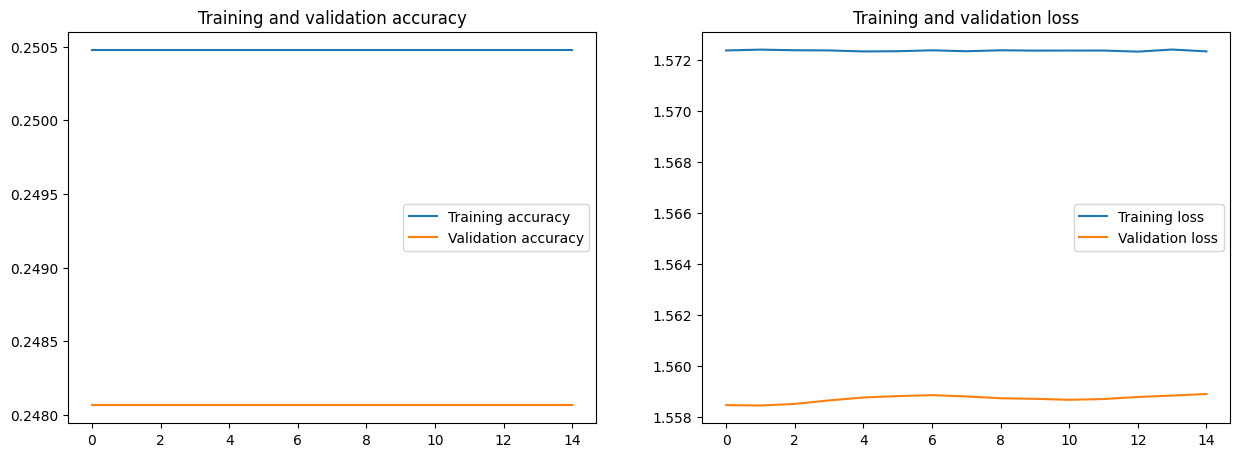

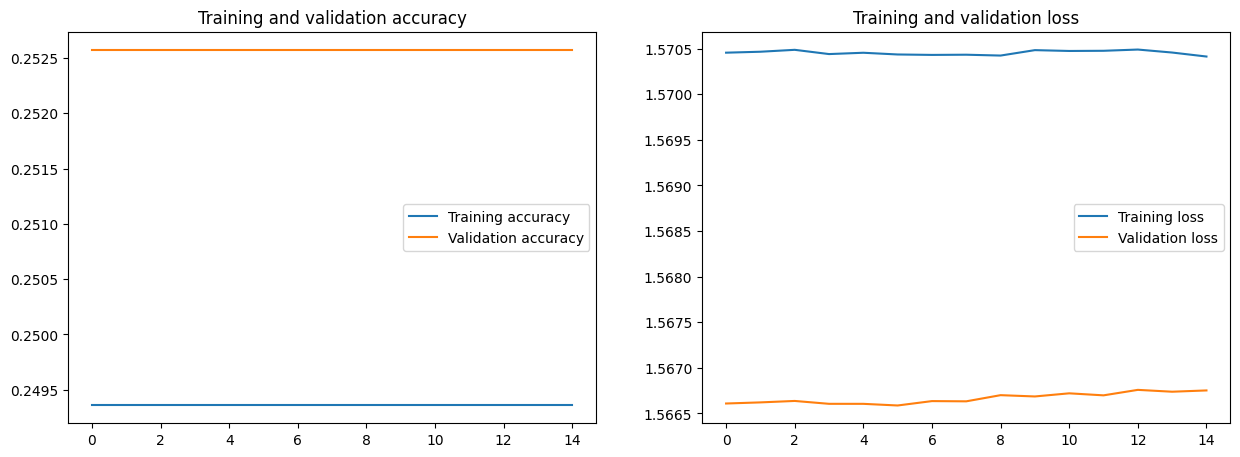

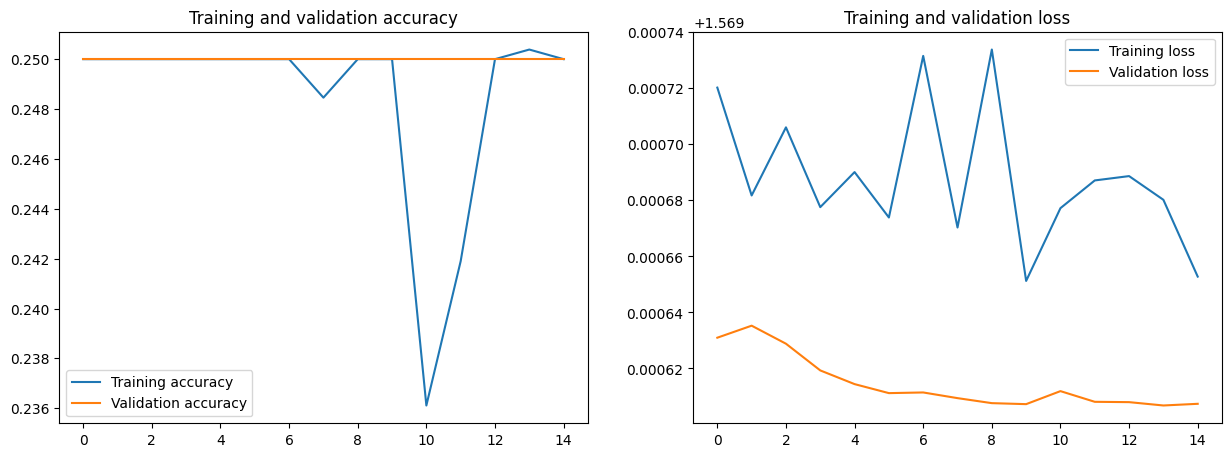

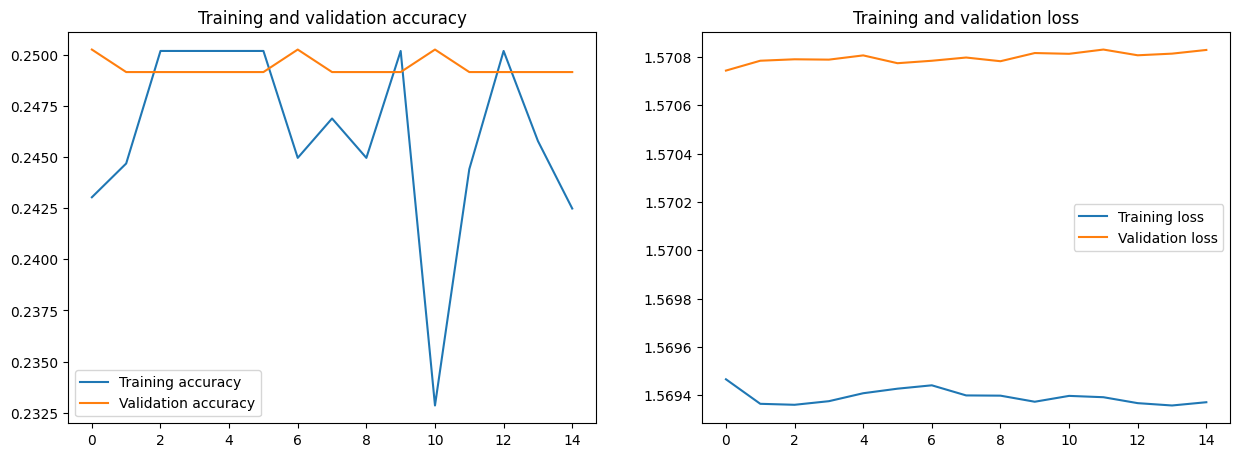

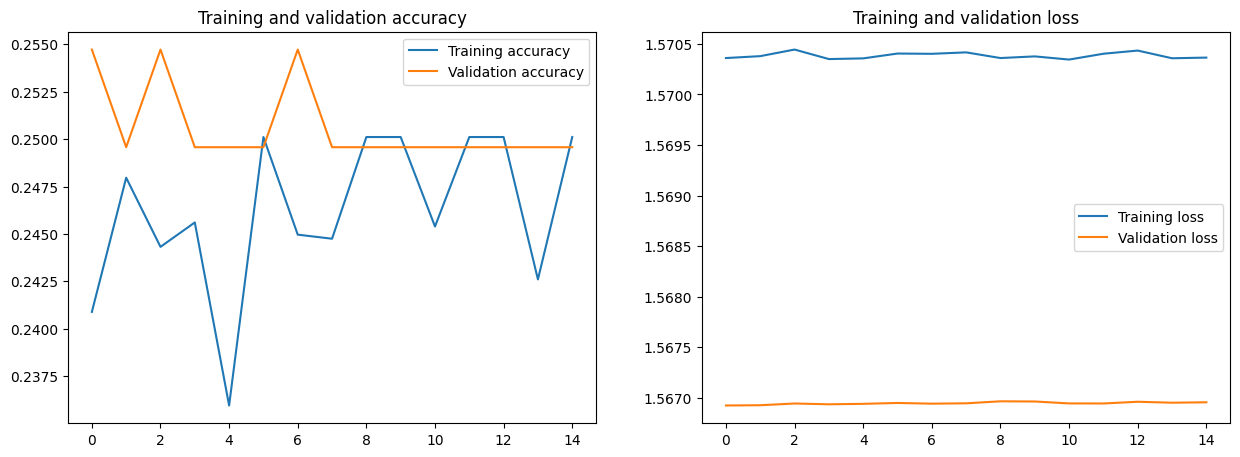

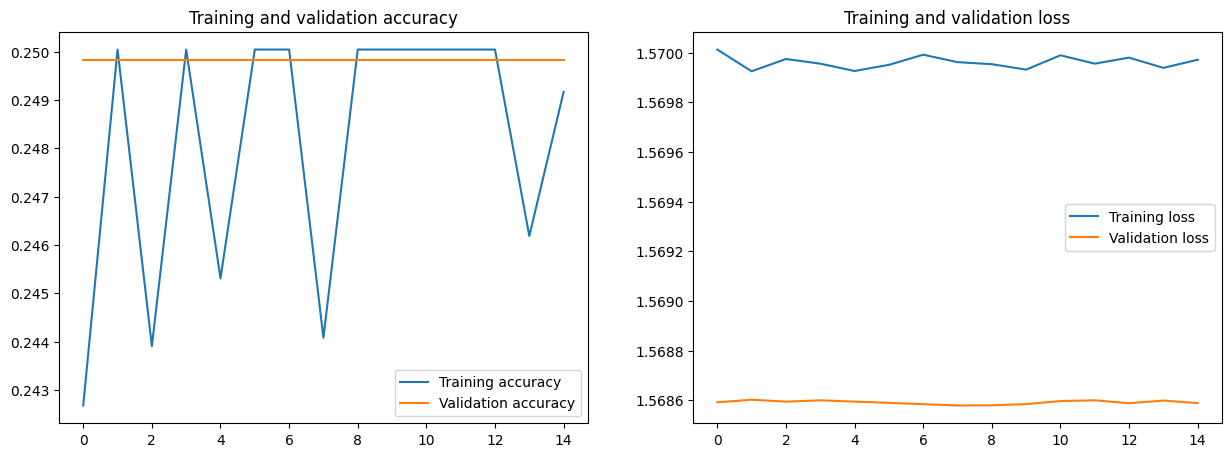

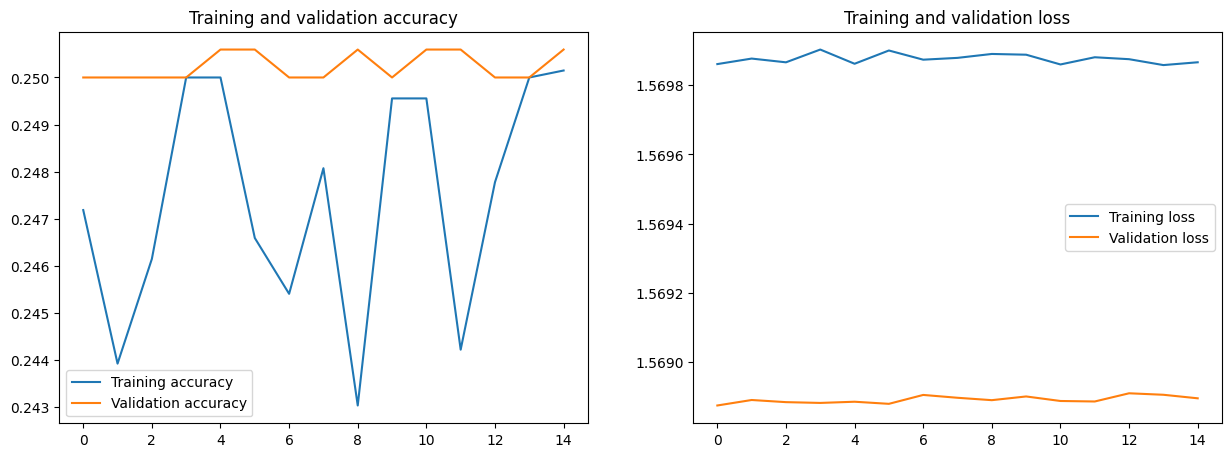

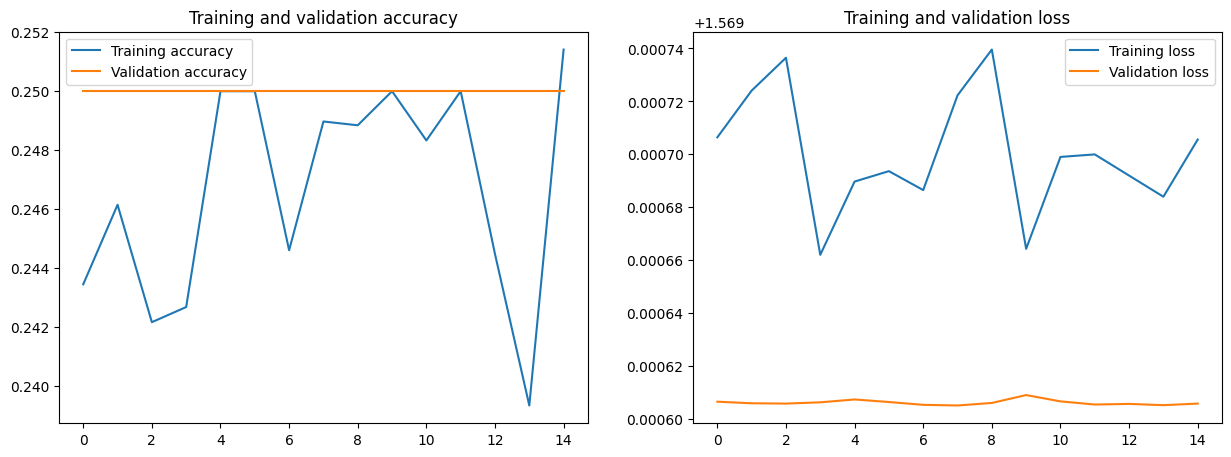

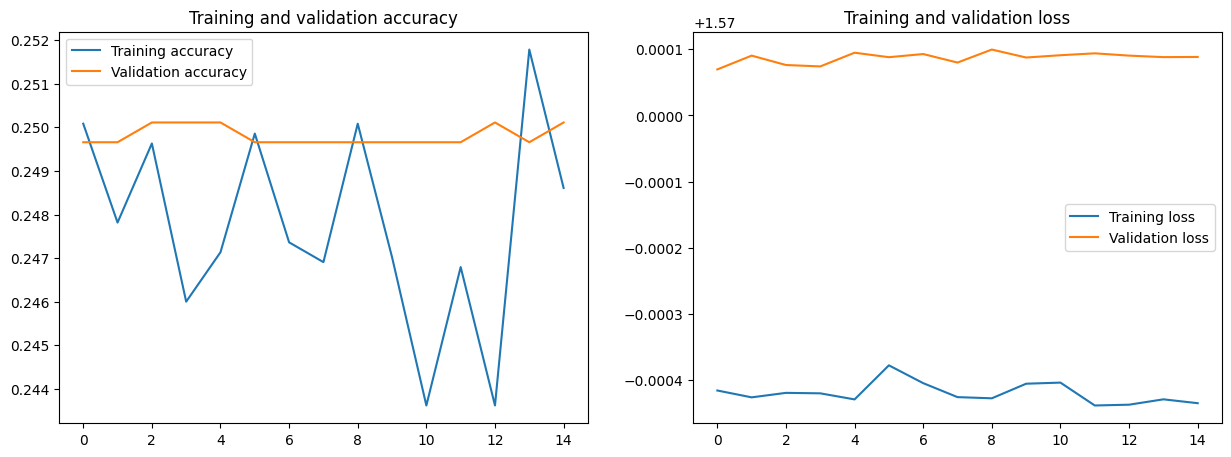

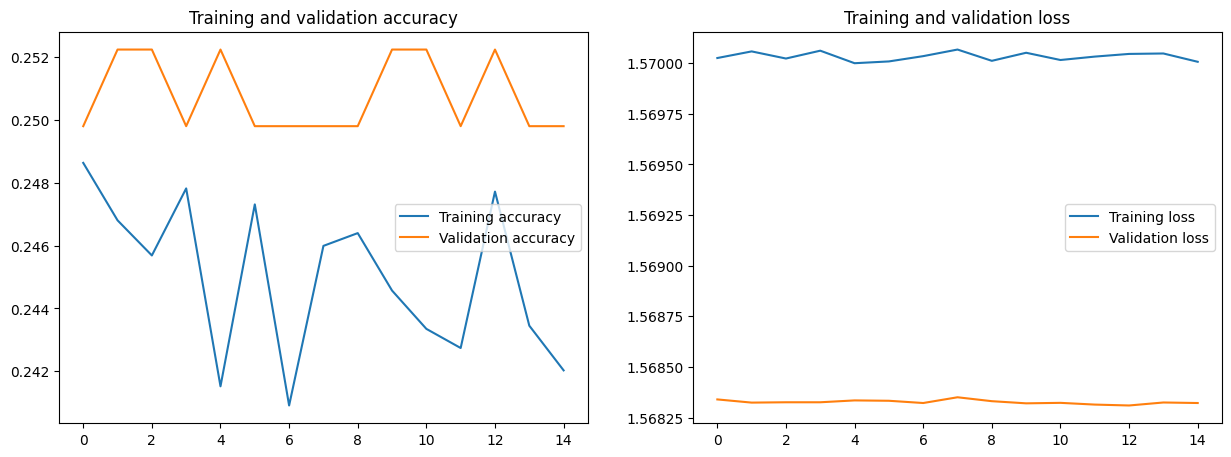

In [157]:
rotation_results = pd.DataFrame(columns=['num of rotations', 'loss', 'accuracy'])
epochs_num = 15
epoch_range = range(epochs_num)
for num_of_rotations in np.arange(1, 21, 2):
    print(num_of_rotations)
    new_rotated_data, new_rotated_labels =  rotate_n_times(np.concatenate((chopped_data.x_train, chopped_data.x_val), axis=0),
                                                            np.concatenate((chopped_data.y_train, chopped_data.y_val), axis=0), num_of_rotations)
    #new_rotated_data = DataVisualization(label_names, new_rotated_data, new_rotated_labels,
    #                                     np.zeros((0, img_init_shape[0]*img_init_shape[1]*3)), np.zeros((0, )))
    new_data = DataVisualization(label_names, new_rotated_data, new_rotated_labels,
                                         chopped_data.x_train, chopped_data.y_train, image_shape=img_chopped_shape)
    new_data.make_val()
    new_data.make_data()
    #print(new_data.x_train.shape, new_data.y_train.shape, new_data.x_val.shape, new_data.y_val.shape, new_data.x_test.shape, new_data.y_test.shape)
    model_work = ModelVisualization(model, new_data)
    model_work.model_fit(epochs_num)
    # model_work.draw_model_plot()
    loss, accuracy = model_work.model.evaluate(model_work.data.x_image_test, model_work.data.y_vect_test)

    history = model_work.get_history()

    fig, ax = plt.subplots(figsize=(15, 60))

    plt.subplot(10, 2, num_of_rotations)
    plt.plot(epoch_range, history['accuracy'], label='Training accuracy')
    plt.plot(epoch_range, history['val_accuracy'], label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.subplot(10, 2, num_of_rotations + 1)
    plt.plot(epoch_range, history['loss'], label='Training loss')
    plt.plot(epoch_range, history['val_loss'], label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    new_row = {'num of rotations':num_of_rotations, 'loss':loss, 'accuracy':accuracy}
    # saturation_results.append(new_row, ignore_index=True)
    rotation_results = pd.concat([rotation_results, pd.DataFrame.from_records([new_row])], ignore_index=True)
plt.show()

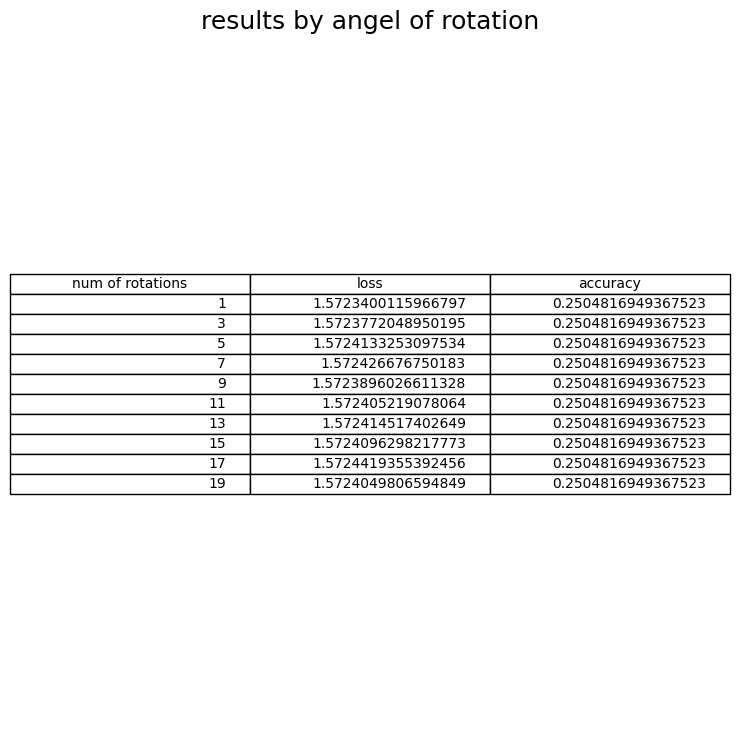

In [158]:
draw_dataframe(rotation_results, 'results by angel of rotation')

In [159]:
rotated_data, rotated_labels = rotate_n_times(np.concatenate((chopped_data.x_train, chopped_data.x_val), axis=0),
                                                           np.concatenate((chopped_data.y_train, chopped_data.y_val), axis=0))

## Flip

In [160]:
rotated_image_data = np.array([image_chopped_format(rotated_data[i]) for i in range(rotated_data.shape[0])])

In [161]:
flipped_image_data = tf.image.flip_left_right(rotated_image_data).numpy()
flipped_labels = rotated_labels

In [162]:
flipped_data = flipped_image_data.reshape(flipped_image_data.shape[0], -1)

## Собираем датасет после геометрических преобразований

In [207]:
full_data = DataVisualization(label_names, np.concatenate((rotated_data, flipped_data), axis=0),
                              np.concatenate((rotated_labels, flipped_labels), axis=0),
                                         chopped_data.x_train, chopped_data.y_train, image_shape=img_chopped_shape)

In [208]:
print(full_data.x_train.shape, full_data.y_train.shape, full_data.x_test.shape, full_data.y_test.shape)

(3888, 30000) (3888,) (519, 30000) (519,)


## Яркость

In [190]:
def draw_factor_stat(factors, title):
    fig, ax = plt.subplots(figsize=(5, 5))
    plt.hist(factors, bins=100)
    plt.title(title)
    plt.show()

In [191]:
def run_model(model_work, epochs_num):
    model_work.model_fit(epochs_num)
    model_work.draw_model_plot()
    loss, accuracy = model_work.draw_model_results()
    return loss, accuracy

In [192]:
def result_model(model_work):
    model_work.make_predictions()
    model_work.draw_confusion_matrix()
    draw_dataframe(model_work.metrics(), 'model_results')

In [193]:
def augmentation_brightness(data, labels, distribution='standard'):
    size = data.shape[0]
    rng = np.random.default_rng()
    if distribution == 'normal':
        factors = rng.normal(0, 0.25, size=size)
    if distribution == 'beta':
        factors = rng.beta(3, 3, size=size) * -2 + 1
    if distribution == 'uniform':
        factors = rng.uniform(-1, 1, size=size)
    if distribution == 'standard':
        factors = rng.standard_normal(size=size) / 4
    brighted_data = [(tf.image.adjust_brightness(image_chopped_format(data[i]), factors[i])).numpy().reshape(
        img_chopped_shape[0] * img_chopped_shape[1] * 3, ) for i in range(size)]
    return np.array(brighted_data), factors

In [194]:
brighted_data, brighted_factors = augmentation_brightness(full_data.x_train, full_data.y_train)

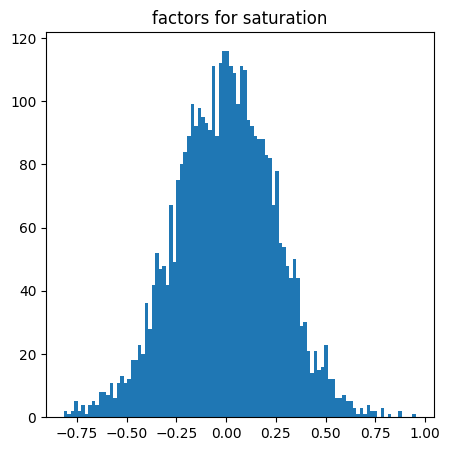

In [195]:
draw_factor_stat(brighted_factors, "factors for saturation")

## Шум

In [171]:
def add_gaussian_noise(image, stddev):
    # image must be scaled in [0, 1]
    with tf.name_scope('Add_gaussian_noise'):
        rng = np.random.default_rng()
        noise = rng.normal(0.0, abs(stddev), size=image.shape)
        # noise = tf.random_normal(shape=tf.shape(image), mean=0.0, stddev=stddev, dtype=tf.float32)
        noise_img = image + noise
        noise_img = tf.clip_by_value(noise_img, 0.0, 1.0)
    return noise_img

In [172]:
def augmentation_gaussian(data, labels, mean_factor=1.5):
    size = data.shape[0]
    rng = np.random.default_rng()
    factors = rng.normal(mean_factor, 0.3, size=size)
    gaussian_data = [(add_gaussian_noise(data[i], factors[i])).numpy() for i in range(size)]
    return np.array(gaussian_data), factors

In [196]:
gaussian_data, gaussian_factors = augmentation_gaussian(full_data.x_train, full_data.y_train)

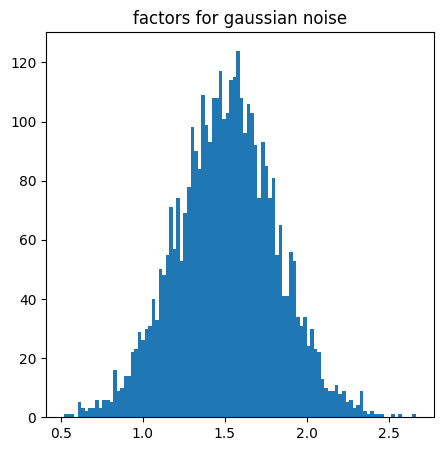

In [197]:
draw_factor_stat(gaussian_factors, "factors for gaussian noise")

0.5
Epoch 1/20
98/98 [==============================] - 4s 38ms/step - loss: 2.3438 - accuracy: 0.2529 - val_loss: 1.5703 - val_accuracy: 0.2502
Epoch 2/20
98/98 [==============================] - 3s 32ms/step - loss: 1.5695 - accuracy: 0.2485 - val_loss: 1.5703 - val_accuracy: 0.2495
Epoch 3/20
98/98 [==============================] - 3s 32ms/step - loss: 1.5695 - accuracy: 0.2475 - val_loss: 1.5703 - val_accuracy: 0.2495
Epoch 4/20
98/98 [==============================] - 3s 32ms/step - loss: 1.5695 - accuracy: 0.2459 - val_loss: 1.5703 - val_accuracy: 0.2495
Epoch 5/20
98/98 [==============================] - 3s 32ms/step - loss: 1.5695 - accuracy: 0.2501 - val_loss: 1.5703 - val_accuracy: 0.2495
Epoch 6/20
98/98 [==============================] - 3s 32ms/step - loss: 1.5695 - accuracy: 0.2501 - val_loss: 1.5703 - val_accuracy: 0.2495
Epoch 7/20
98/98 [==============================] - 3s 32ms/step - loss: 1.5695 - accuracy: 0.2501 - val_loss: 1.5703 - val_accuracy: 0.2495
Epoch 8/2

<ipython-input-175-61b8c9378fe1>:25: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4, 3, 3*int(mean_intensity // 0.5) - 2)


1.0
Epoch 1/20
98/98 [==============================] - 4s 38ms/step - loss: 1.5695 - accuracy: 0.2374 - val_loss: 1.5703 - val_accuracy: 0.2502
Epoch 2/20
98/98 [==============================] - 3s 32ms/step - loss: 1.5695 - accuracy: 0.2496 - val_loss: 1.5703 - val_accuracy: 0.2495
Epoch 3/20
98/98 [==============================] - 3s 33ms/step - loss: 1.5696 - accuracy: 0.2410 - val_loss: 1.5703 - val_accuracy: 0.2495
Epoch 4/20
98/98 [==============================] - 3s 32ms/step - loss: 1.5695 - accuracy: 0.2403 - val_loss: 1.5703 - val_accuracy: 0.2502
Epoch 5/20
98/98 [==============================] - 3s 32ms/step - loss: 1.5695 - accuracy: 0.2440 - val_loss: 1.5703 - val_accuracy: 0.2502
Epoch 6/20
98/98 [==============================] - 3s 32ms/step - loss: 1.5696 - accuracy: 0.2500 - val_loss: 1.5703 - val_accuracy: 0.2502
Epoch 7/20
98/98 [==============================] - 3s 32ms/step - loss: 1.5695 - accuracy: 0.2480 - val_loss: 1.5703 - val_accuracy: 0.2495
Epoch 8/2

<ipython-input-175-61b8c9378fe1>:25: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4, 3, 3*int(mean_intensity // 0.5) - 2)


1.5
Epoch 1/20
98/98 [==============================] - 4s 39ms/step - loss: 1.5695 - accuracy: 0.2442 - val_loss: 1.5703 - val_accuracy: 0.2502
Epoch 2/20
98/98 [==============================] - 3s 33ms/step - loss: 1.5695 - accuracy: 0.2400 - val_loss: 1.5703 - val_accuracy: 0.2502
Epoch 3/20
98/98 [==============================] - 3s 33ms/step - loss: 1.5696 - accuracy: 0.2459 - val_loss: 1.5703 - val_accuracy: 0.2495
Epoch 4/20
98/98 [==============================] - 3s 33ms/step - loss: 1.5695 - accuracy: 0.2394 - val_loss: 1.5703 - val_accuracy: 0.2502
Epoch 5/20
98/98 [==============================] - 3s 33ms/step - loss: 1.5695 - accuracy: 0.2459 - val_loss: 1.5703 - val_accuracy: 0.2502
Epoch 6/20
98/98 [==============================] - 3s 33ms/step - loss: 1.5695 - accuracy: 0.2500 - val_loss: 1.5703 - val_accuracy: 0.2502
Epoch 7/20
98/98 [==============================] - 3s 33ms/step - loss: 1.5695 - accuracy: 0.2500 - val_loss: 1.5703 - val_accuracy: 0.2502
Epoch 8/2

<ipython-input-175-61b8c9378fe1>:25: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4, 3, 3*int(mean_intensity // 0.5) - 2)


2.0
Epoch 1/20
98/98 [==============================] - 4s 39ms/step - loss: 1.5696 - accuracy: 0.2500 - val_loss: 1.5703 - val_accuracy: 0.2502
Epoch 2/20
98/98 [==============================] - 3s 33ms/step - loss: 1.5695 - accuracy: 0.2453 - val_loss: 1.5703 - val_accuracy: 0.2502
Epoch 3/20
98/98 [==============================] - 3s 32ms/step - loss: 1.5695 - accuracy: 0.2500 - val_loss: 1.5703 - val_accuracy: 0.2502
Epoch 4/20
98/98 [==============================] - 3s 34ms/step - loss: 1.5696 - accuracy: 0.2500 - val_loss: 1.5703 - val_accuracy: 0.2502
Epoch 5/20
98/98 [==============================] - 3s 33ms/step - loss: 1.5696 - accuracy: 0.2430 - val_loss: 1.5703 - val_accuracy: 0.2502
Epoch 6/20
98/98 [==============================] - 3s 33ms/step - loss: 1.5695 - accuracy: 0.2467 - val_loss: 1.5703 - val_accuracy: 0.2502
Epoch 7/20
98/98 [==============================] - 3s 33ms/step - loss: 1.5695 - accuracy: 0.2514 - val_loss: 1.5703 - val_accuracy: 0.2495
Epoch 8/2

<ipython-input-175-61b8c9378fe1>:25: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4, 3, 3*int(mean_intensity // 0.5) - 2)


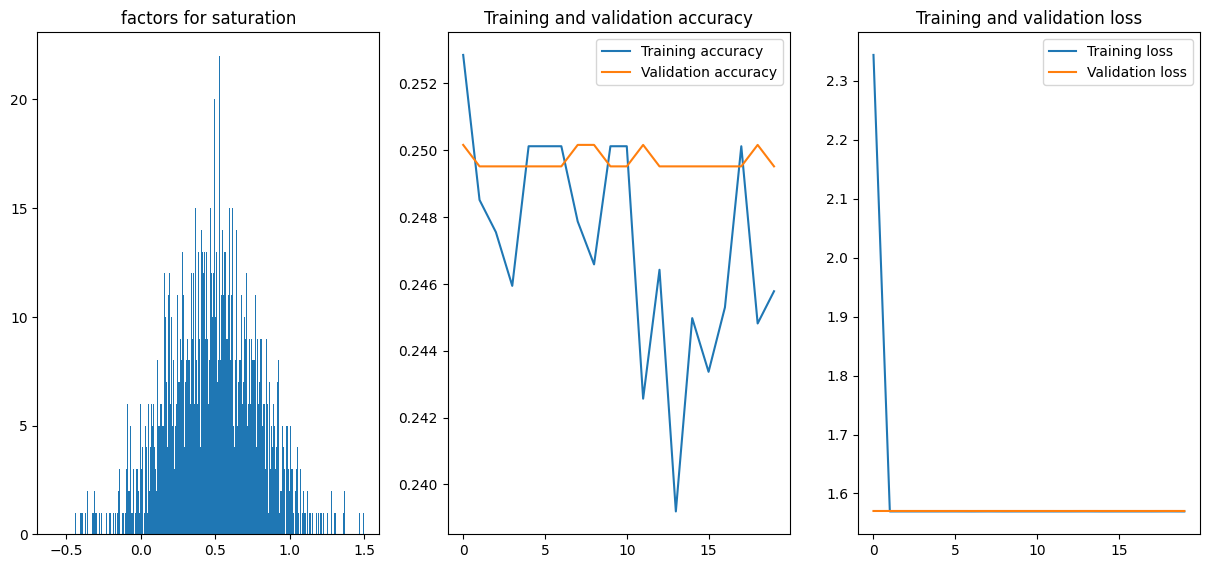

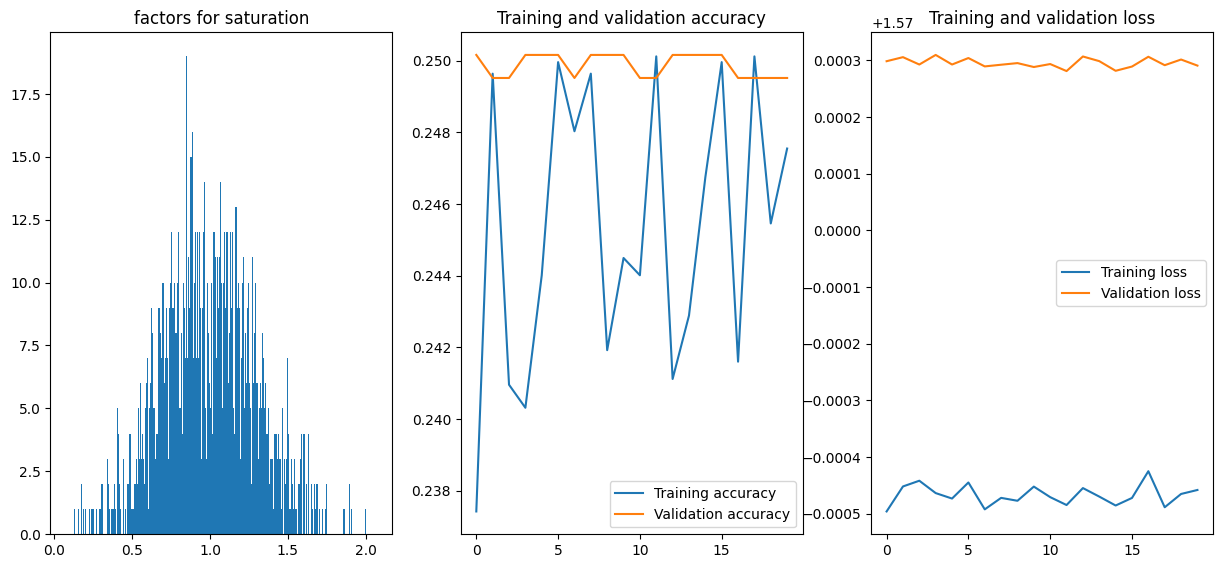

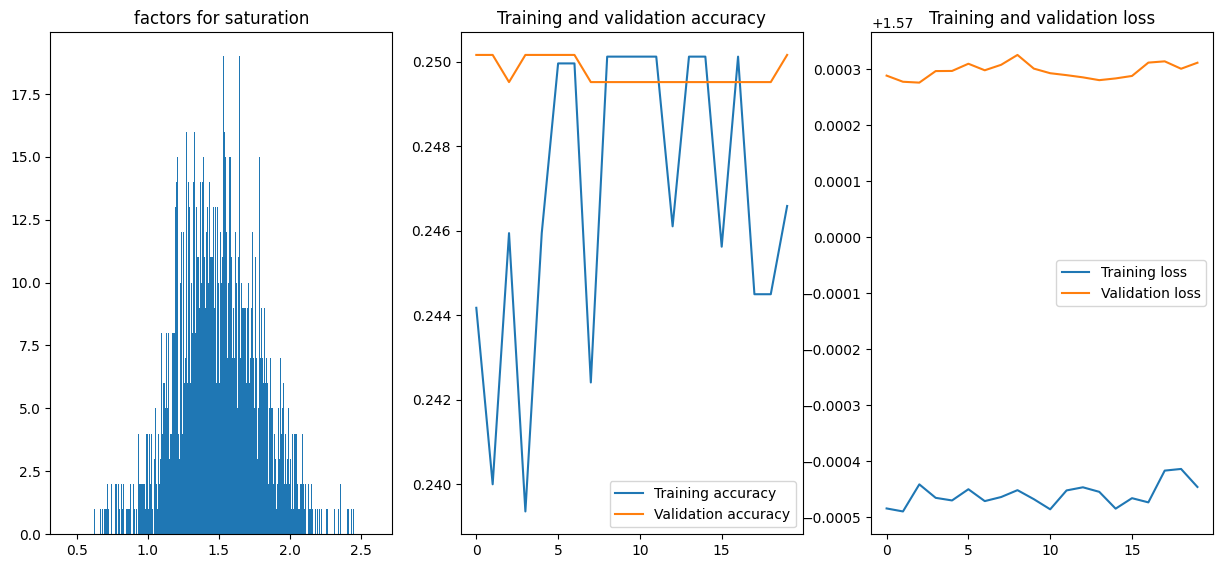

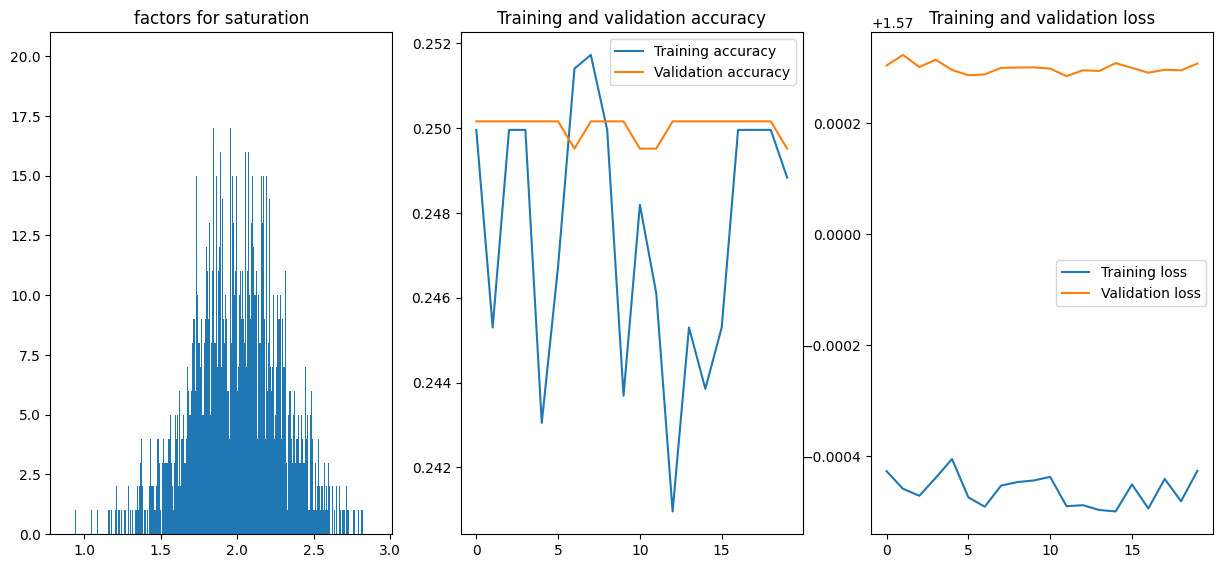

In [175]:
gaussian_results = pd.DataFrame(columns=['mean_intensity', 'loss', 'accuracy'])
epochs_num = 20
epoch_range = range(epochs_num)
for mean_intensity in np.arange(0.5, 2.5, 0.5):
    print(mean_intensity)
    new_gaussian_data, new_gaussian_factors = augmentation_gaussian(full_data.x_train, full_data.y_train, mean_intensity)
    #draw_factor_stat(saturated_factors, "factors for saturation")
    #new_gaussian_data = DataVisualization(label_names, new_gaussian_data, full_data.y_train,
    #                                      np.zeros((0, img_chopped_shape[0] * img_chopped_shape[1] * 3)), np.zeros((0, )))
    new_data = DataVisualization(label_names,
                                 np.concatenate((full_data.x_train, new_gaussian_data), axis=0),
                                 np.concatenate((full_data.y_train, full_data.y_train), axis=0),
                                         chopped_data.x_train, chopped_data.y_train, image_shape=img_chopped_shape)
    new_data.make_val()
    new_data.make_data()
    #print(new_data.x_train.shape, new_data.y_train.shape, new_data.x_val.shape, new_data.y_val.shape, new_data.x_test.shape, new_data.y_test.shape)
    model_work = ModelVisualization(model, new_data)
    model_work.model_fit(epochs_num)
    # model_work.draw_model_plot()
    loss, accuracy = model_work.model.evaluate(model_work.data.x_image_test, model_work.data.y_vect_test)

    history = model_work.get_history()

    fig, ax = plt.subplots(figsize=(15, 30))
    plt.subplot(4, 3, 3*int(mean_intensity // 0.5) - 2)
    plt.hist(new_gaussian_factors, bins=1000)
    plt.title('factors for saturation')

    plt.subplot(4, 3, 3*int(mean_intensity // 0.5) - 1)
    plt.plot(epoch_range, history['accuracy'], label='Training accuracy')
    plt.plot(epoch_range, history['val_accuracy'], label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.subplot(4, 3, 3*int(mean_intensity // 0.5))
    plt.plot(epoch_range, history['loss'], label='Training loss')
    plt.plot(epoch_range, history['val_loss'], label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    new_row = {'mean_intensity':mean_intensity, 'loss':loss, 'accuracy':accuracy}
    # saturation_results.append(new_row, ignore_index=True)
    gaussian_results = pd.concat([gaussian_results, pd.DataFrame.from_records([new_row])], ignore_index=True)
plt.show()

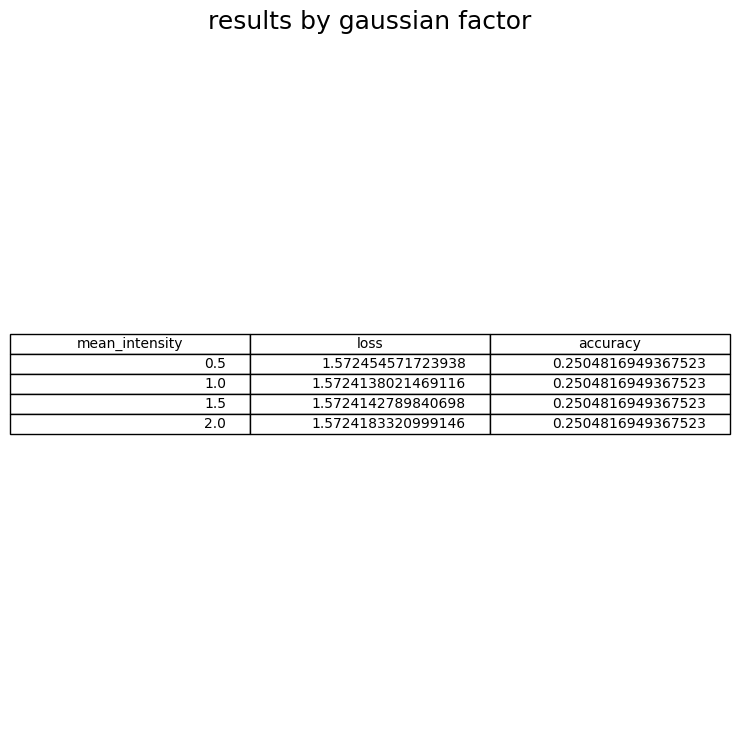

In [176]:
draw_dataframe(gaussian_results, 'results by gaussian factor')

## Собираем аугментированный датасет

In [209]:
augmented_data = DataVisualization(label_names, np.concatenate((full_data.x_train, brighted_data, gaussian_data), axis=0),
                                   np.concatenate((full_data.y_train, full_data.y_train, full_data.y_train), axis=0),
                                   chopped_data.x_test, chopped_data.y_test, image_shape=img_chopped_shape)

In [210]:
print(augmented_data.x_train.shape, augmented_data.y_train.shape, augmented_data.x_test.shape, augmented_data.y_test.shape)

(11664, 30000) (11664,) (180, 30000) (180,)


# Датасеты

## Датасет с геометрической аугментацией

In [211]:
full_data.shuffle_data()
full_data.make_val()
full_data.make_data()

In [212]:
full_data.make_data_stat()

In [213]:
full_data.size_data_analysis()

,name,size,std
0,train,3111,167.449574
1,val,777,46.842716
2,test,519,27.556487


In [214]:
full_data.class_data_analysis()

,name,clear,G,GP,M,T
0,train,453,766,732,386,774
1,val,123,206,168,82,198
2,test,78,130,117,64,130


## Аугментированный датасет

In [215]:
augmented_data.shuffle_data()
augmented_data.make_val()
augmented_data.make_data()

In [216]:
augmented_data.make_data_stat()

In [217]:
augmented_data.size_data_analysis()

,name,size,std
0,train,9332,514.141459
1,val,2332,126.941876
2,test,180,7.589466


In [218]:
augmented_data.class_data_analysis()

,name,clear,G,GP,M,T
0,train,1394,2340,2128,1114,2356
1,val,334,576,572,290,560
2,test,30,42,42,24,42


# Проверка эффективности

## Фрагментированный датасет

In [219]:
chopped_model_work = ModelVisualization(model, chopped_data)

Epoch 1/50
9/9 [==============================] - 0s 42ms/step - loss: 1.5725 - accuracy: 0.2505 - val_loss: 1.5583 - val_accuracy: 0.2481
Epoch 2/50
9/9 [==============================] - 0s 34ms/step - loss: 1.5724 - accuracy: 0.2505 - val_loss: 1.5584 - val_accuracy: 0.2481
Epoch 3/50
9/9 [==============================] - 0s 34ms/step - loss: 1.5724 - accuracy: 0.2505 - val_loss: 1.5584 - val_accuracy: 0.2481
Epoch 4/50
9/9 [==============================] - 0s 34ms/step - loss: 1.5724 - accuracy: 0.2505 - val_loss: 1.5585 - val_accuracy: 0.2481
Epoch 5/50
9/9 [==============================] - 0s 34ms/step - loss: 1.5724 - accuracy: 0.2505 - val_loss: 1.5585 - val_accuracy: 0.2481
Epoch 6/50
9/9 [==============================] - 0s 33ms/step - loss: 1.5724 - accuracy: 0.2505 - val_loss: 1.5585 - val_accuracy: 0.2481
Epoch 7/50
9/9 [==============================] - 0s 34ms/step - loss: 1.5724 - accuracy: 0.2505 - val_loss: 1.5586 - val_accuracy: 0.2481
Epoch 8/50
9/9 [===========

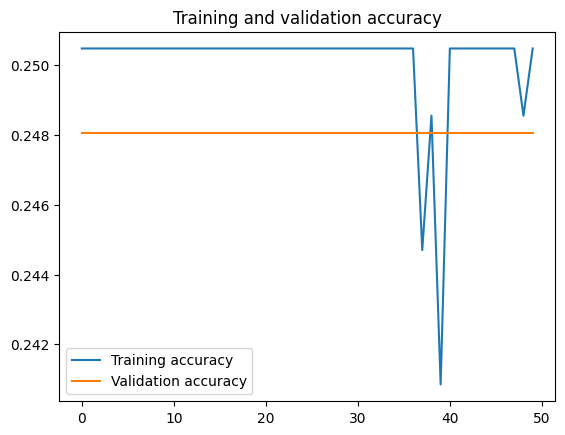

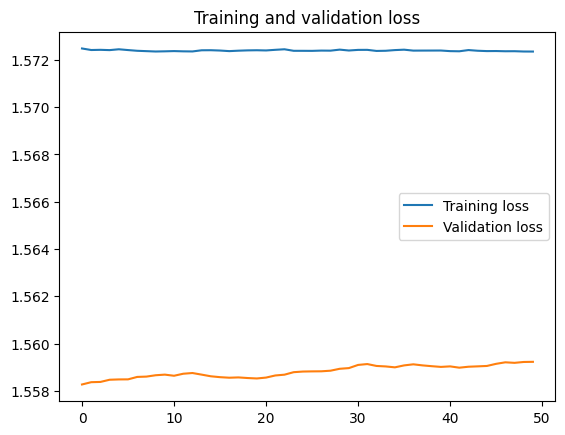

6/6 [==============================] - 0s 8ms/step - loss: 1.5883 - accuracy: 0.2333
Accuracy for test data :  0.23333333432674408
Loss for test data :  1.5882716178894043


(1.5882716178894043, 0.23333333432674408)

In [220]:
run_model(chopped_model_work, 50)

3/3 [==============================] - 0s 9ms/step


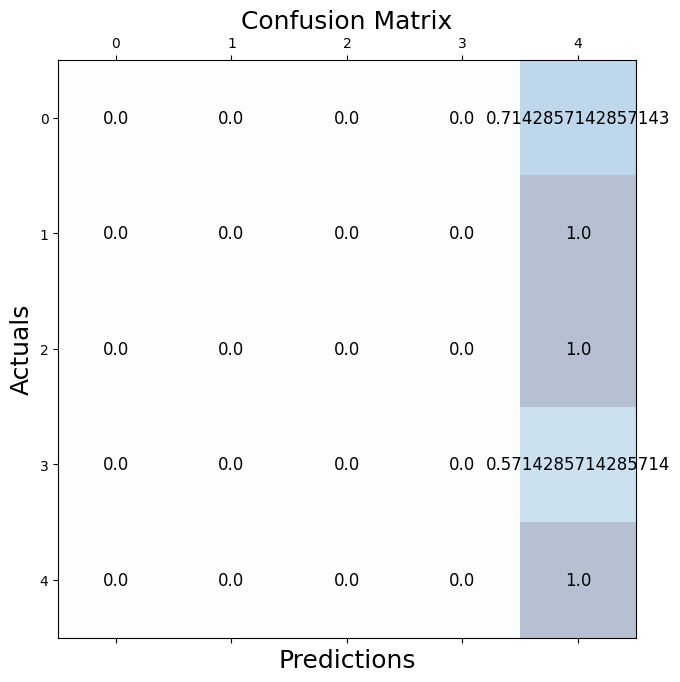

/content/visualization.py:183: RuntimeWarning: invalid value encountered in double_scalars
  acc[self.data.label_names[i]] = self.confusion_matrix[i][i] / sum(self.confusion_matrix[:, i])
/content/visualization.py:195: RuntimeWarning: invalid value encountered in double_scalars
  f1[i] = 2 * (self.confusion_matrix[i, i] / sum(self.confusion_matrix[:, i])) \
/content/visualization.py:197: RuntimeWarning: invalid value encountered in double_scalars
  (self.confusion_matrix[i, i] / sum(self.confusion_matrix[:, i]))


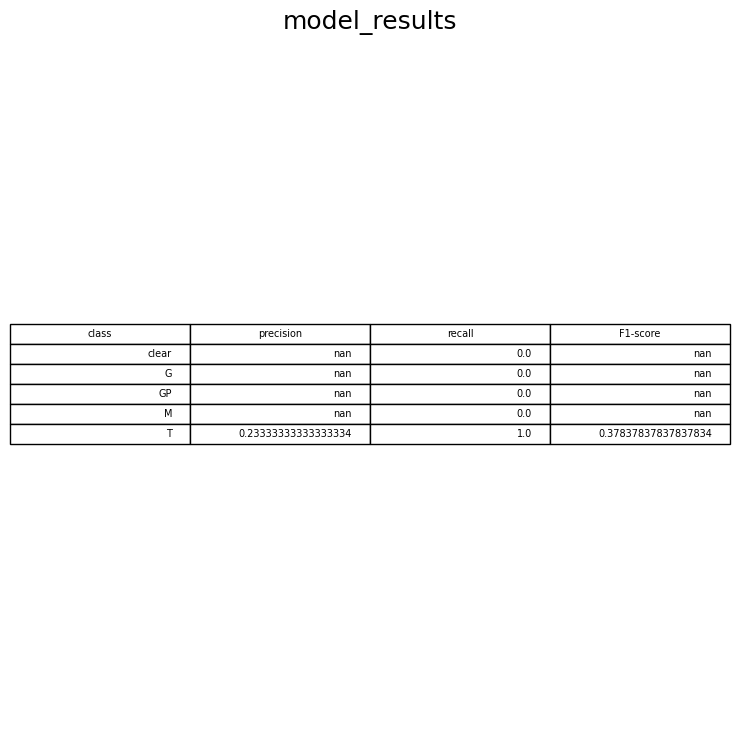

In [221]:
result_model(chopped_model_work)

## Датасет с геометрической аугментацией

In [222]:
full_model_work = ModelVisualization(model, full_data)

Epoch 1/50
49/49 [==============================] - 2s 39ms/step - loss: 1.5713 - accuracy: 0.2372 - val_loss: 1.5636 - val_accuracy: 0.2548
Epoch 2/50
49/49 [==============================] - 2s 33ms/step - loss: 1.5713 - accuracy: 0.2488 - val_loss: 1.5637 - val_accuracy: 0.2548
Epoch 3/50
49/49 [==============================] - 2s 33ms/step - loss: 1.5713 - accuracy: 0.2356 - val_loss: 1.5637 - val_accuracy: 0.2548
Epoch 4/50
49/49 [==============================] - 2s 33ms/step - loss: 1.5713 - accuracy: 0.2488 - val_loss: 1.5638 - val_accuracy: 0.2548
Epoch 5/50
49/49 [==============================] - 2s 33ms/step - loss: 1.5712 - accuracy: 0.2408 - val_loss: 1.5639 - val_accuracy: 0.2548
Epoch 6/50
49/49 [==============================] - 2s 33ms/step - loss: 1.5712 - accuracy: 0.2488 - val_loss: 1.5640 - val_accuracy: 0.2548
Epoch 7/50
49/49 [==============================] - 2s 32ms/step - loss: 1.5712 - accuracy: 0.2488 - val_loss: 1.5640 - val_accuracy: 0.2548
Epoch 8/50
49

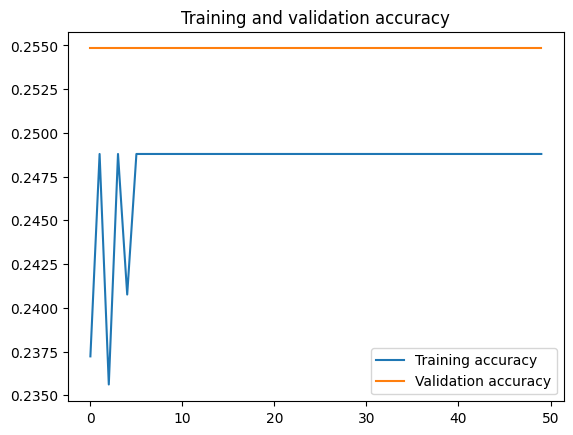

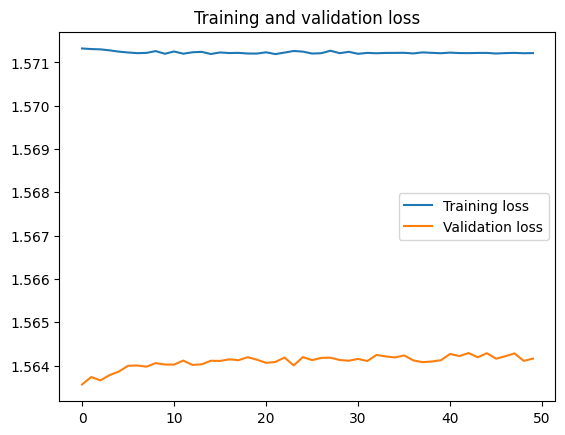

17/17 [==============================] - 0s 7ms/step - loss: 1.5726 - accuracy: 0.2505
Accuracy for test data :  0.2504816949367523
Loss for test data :  1.572592854499817


(1.572592854499817, 0.2504816949367523)

In [223]:
run_model(full_model_work, 50)

9/9 [==============================] - 0s 9ms/step


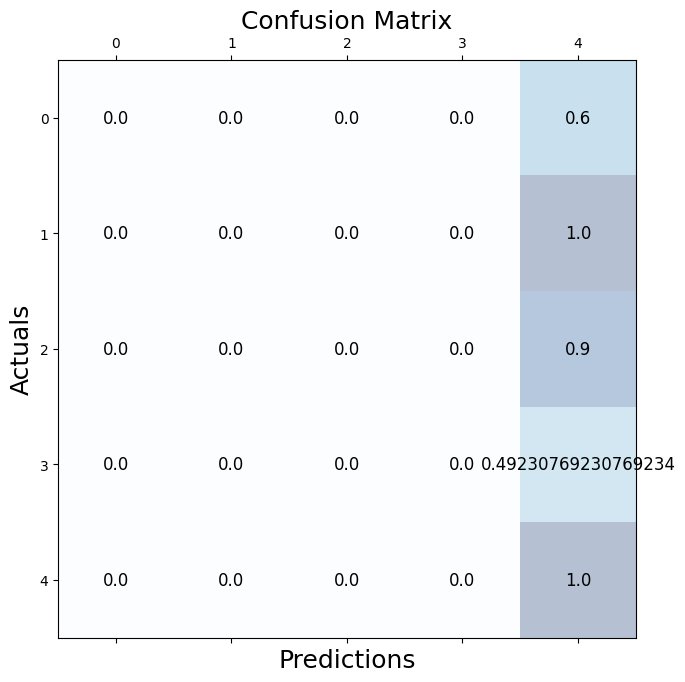

/content/visualization.py:183: RuntimeWarning: invalid value encountered in double_scalars
  acc[self.data.label_names[i]] = self.confusion_matrix[i][i] / sum(self.confusion_matrix[:, i])
/content/visualization.py:195: RuntimeWarning: invalid value encountered in double_scalars
  f1[i] = 2 * (self.confusion_matrix[i, i] / sum(self.confusion_matrix[:, i])) \
/content/visualization.py:197: RuntimeWarning: invalid value encountered in double_scalars
  (self.confusion_matrix[i, i] / sum(self.confusion_matrix[:, i]))


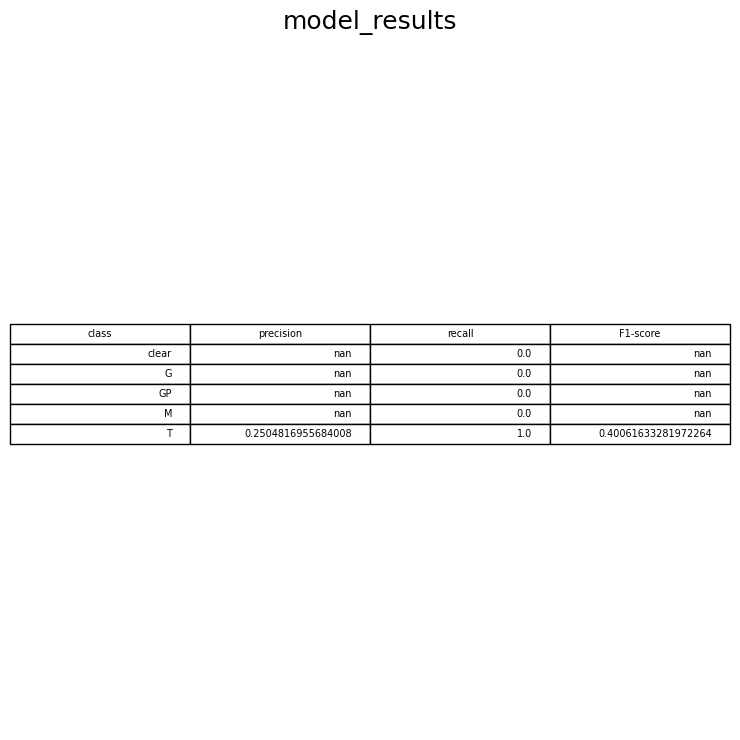

In [224]:
result_model(full_model_work)

## Аугментированный датасет

In [225]:
augmented_model_work = ModelVisualization(model, augmented_data)

Epoch 1/50
146/146 [==============================] - 6s 40ms/step - loss: 1.5695 - accuracy: 0.2525 - val_loss: 1.5709 - val_accuracy: 0.2401
Epoch 2/50
146/146 [==============================] - 5s 32ms/step - loss: 1.5694 - accuracy: 0.2525 - val_loss: 1.5711 - val_accuracy: 0.2401
Epoch 3/50
146/146 [==============================] - 5s 32ms/step - loss: 1.5694 - accuracy: 0.2480 - val_loss: 1.5712 - val_accuracy: 0.2401
Epoch 4/50
146/146 [==============================] - 5s 32ms/step - loss: 1.5693 - accuracy: 0.2525 - val_loss: 1.5713 - val_accuracy: 0.2401
Epoch 5/50
146/146 [==============================] - 5s 32ms/step - loss: 1.5693 - accuracy: 0.2525 - val_loss: 1.5714 - val_accuracy: 0.2401
Epoch 6/50
146/146 [==============================] - 5s 32ms/step - loss: 1.5693 - accuracy: 0.2452 - val_loss: 1.5714 - val_accuracy: 0.2401
Epoch 7/50
146/146 [==============================] - 5s 33ms/step - loss: 1.5693 - accuracy: 0.2465 - val_loss: 1.5714 - val_accuracy: 0.2401

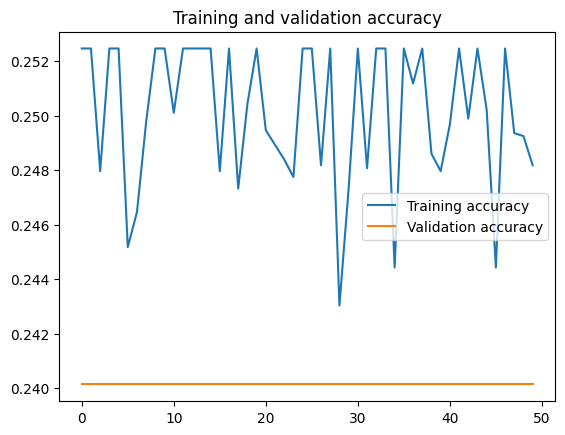

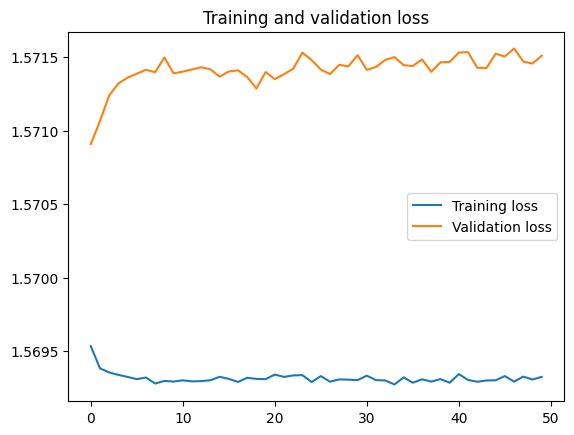

6/6 [==============================] - 0s 7ms/step - loss: 1.5893 - accuracy: 0.2333
Accuracy for test data :  0.23333333432674408
Loss for test data :  1.5892603397369385


(1.5892603397369385, 0.23333333432674408)

In [226]:
run_model(augmented_model_work, 50)

3/3 [==============================] - 0s 9ms/step


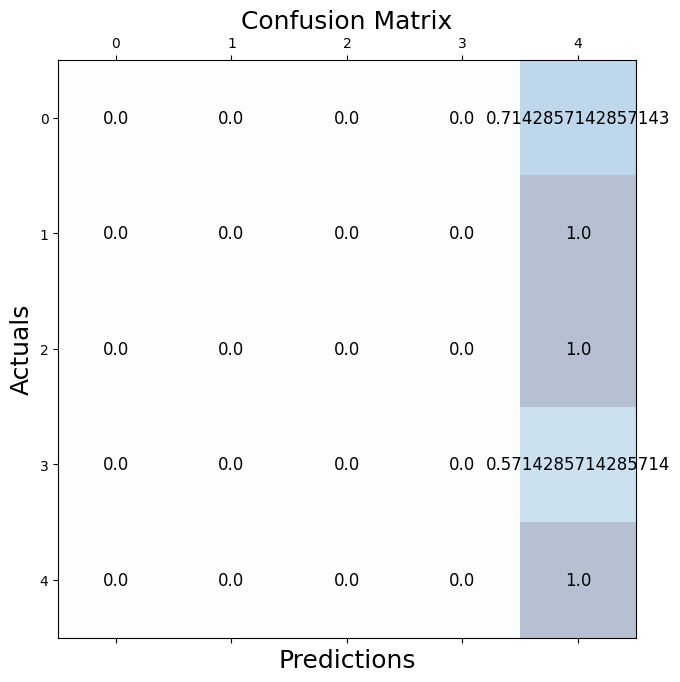

/content/visualization.py:183: RuntimeWarning: invalid value encountered in double_scalars
  acc[self.data.label_names[i]] = self.confusion_matrix[i][i] / sum(self.confusion_matrix[:, i])
/content/visualization.py:195: RuntimeWarning: invalid value encountered in double_scalars
  f1[i] = 2 * (self.confusion_matrix[i, i] / sum(self.confusion_matrix[:, i])) \
/content/visualization.py:197: RuntimeWarning: invalid value encountered in double_scalars
  (self.confusion_matrix[i, i] / sum(self.confusion_matrix[:, i]))


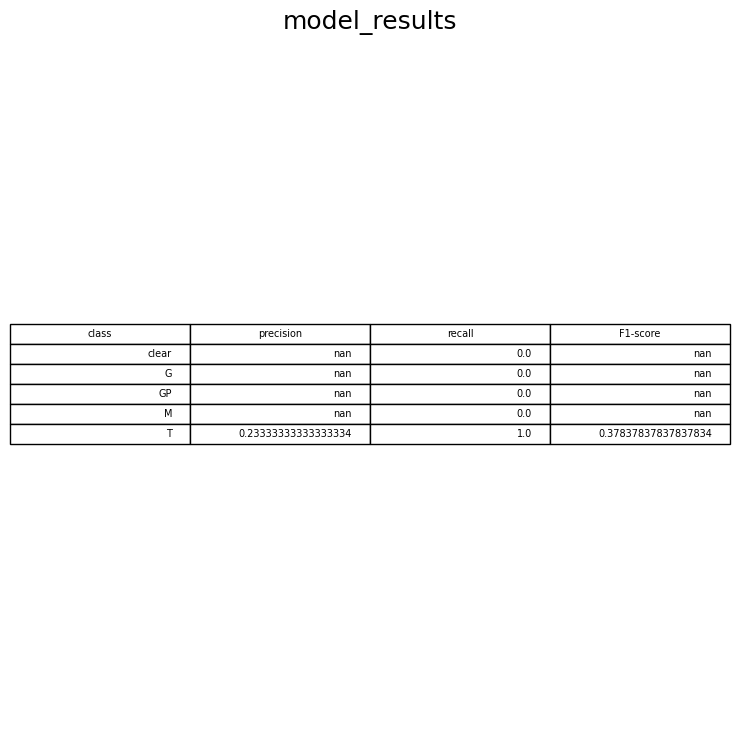

In [227]:
result_model(augmented_model_work)